In [1]:

import serial
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import butter, lfilter
from scipy.signal import find_peaks


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def read_window(line, period):
    i = 0
    line.flush()
    window = np.empty(period)
    while( i < period):
        window[i] = line.readline()
        i += 1
    return window

In [2]:
fs = 1/ 0.005
lowcut = 2
highcut = 6

dict_resp = {}
dict_resp[0] = "Inhaling"
dict_resp[1] = "Exhaling"

In [3]:
line = serial.Serial('/dev/cu.usbmodem141301')
window = read_window(line, 2000)


Inhaling
Inhaling
Exhaling


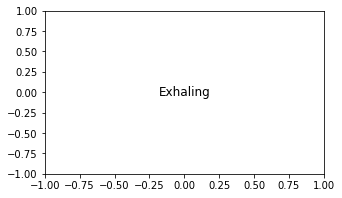

In [15]:
j = 0
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-1, 1), ylim=(-1, 1))
label = ax.text(0, 0, 'start',
                ha='center', va='center',
                fontsize=12)
while(j < 5):
    window = read_window(line, 1000)
    #window = np.concatenate([window[1000:], rt_data])
    x = window
    x = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    peaks, params = find_peaks(x, height = 0.25 * np.mean(x), width = 20)

    x = x[peaks]

    x[x<0.6 * np.mean(params['peak_heights'])] = 0
    x[x >0.6 * np.mean(params['peak_heights'])] = 1


    breath_list = []
    for i in range(int(len(x)/2),len(x)):
        if(i!=0 and x[i-1]==x[i]):
            continue
        else:
#             fig.canvas.flush_events()
            label.set_text(dict_resp[x[i]])
            fig.canvas.draw()
            plt.plot()
            print(dict_resp[x[i]])
            breath_list.append(dict_resp[x[i]])

    peaks, params = find_peaks(x, plateau_size = 2)
    
    
    j+=1
# line.close()

In [16]:
line.close()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-1, 1), ylim=(-1, 1))
label = ax.text(0, 0, 'start',
                ha='center', va='center',
                fontsize=12)
 
def animate(text):
    label.set_text(text)

In [ ]:
anim = FuncAnimation(
    fig, animate)
 
#plt.draw()
# plt.show()

In [ ]:
anim.save('sine_wave.gif')